In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

#  Predicting Financial Crises African Markets

In this project, we will look to use financial data of 13 African countries: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. We will use each of these as indicator economies to analyze the interconectedness of each economy and if the financial hardships of one country can be used to predict the crises of another or if the economies are more isolated than one would think.  

In [2]:
db=pd.read_csv("african_crises.csv")

In [3]:
db.shape[0]

1059

### Initial Impressions

First, we must view the data as a whole in order to look for trends and correlations. This will involve our first steps of data cleaning as well as a look into potential features to add to the data. The first order of business will be to convert the banking crisis column to the familiar numeric form of 1=crisis, 2=no_crisis.

In [4]:
def binary(sting):
    new=str(sting)
    if new=='no_crisis':
        new=0
    if new=='crisis':
        new=1
    return new

db['banking_crisis']=db['banking_crisis'].apply(binary)

In [5]:
db['banking_crisis'].value_counts()

0    965
1     94
Name: banking_crisis, dtype: int64

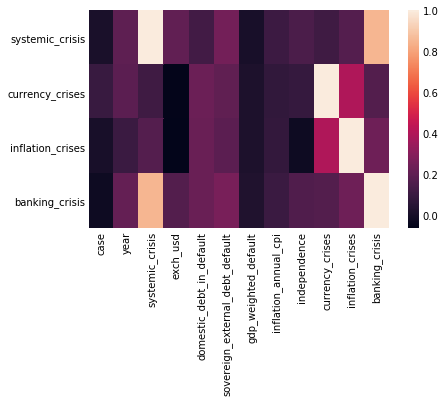

In [6]:
corrs=db.corr().drop(['case','year', 'exch_usd','domestic_debt_in_default', 'sovereign_external_debt_default','gdp_weighted_default', 'inflation_annual_cpi', 'independence'])
sns.heatmap(corrs)

As seen in the heat plot, some of the highest positive correlations occur between the crisis which suggest a strong interrelatedness to them. The largest correlations outside of other cirisis are the exchange rate to US dollars, and whether or not the country was independent. 

In [7]:
db['systemic_crisis'].value_counts(normalize=True)

0    0.922568
1    0.077432
Name: systemic_crisis, dtype: float64

In [8]:
db['currency_crises'].value_counts(normalize=True)

0    0.871577
1    0.124646
2    0.003777
Name: currency_crises, dtype: float64

In [9]:
db[db['currency_crises']==2]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
142,2,AGO,Angola,1995,0,0.005692,1,1,0.00,2672.230000,1,2,1,1
146,2,AGO,Angola,1999,0,5.579920,1,1,0.00,248.248000,1,2,1,0
775,56,ZAF,South Africa,1967,0,0.709300,0,0,0.00,2.151508,1,2,0,0
840,63,TUN,Tunisia,1958,0,0.419700,0,1,0.06,5.216941,1,2,0,0


In [10]:
db.loc[142, 'currency_crises']=1
db.loc[146, 'currency_crises']=1
db.loc[775, 'currency_crises']=0
db.loc[840, 'currency_crises']=1

In [11]:
db.loc[142, 'currency_crises']

1

Since these are suposed to be binary, we need to take a closer look at where the value 2 occurs and complete some outside research to see what values it should be. For the values that pertain to Angola, it had a currency crisis in the surrounding years so it can be surmised that it underwent the same crisis during 1995 and 1999. For the South Africa value, there are no currency crises surrounding it, and there were no banking, inflation or systemic crisis in the same amount of time. In the case of Tunisia, the Dinar was introduced that year after the removal of the Franc. With this, a forgein currency crisis is possible, along with a debt default suggest there was a crisis. 

### Visualization

Now that we have gotten the data into a standardized form, we need to visualize the data in order to look for more clear correlations between our potential factors in order to get an idea for potential features. 

In [12]:
countries=db['country'].value_counts().index

In [13]:
d={}
for one in countries:
    d[one]=db[db['country']==one]

In [14]:
crisis=[]
for col in list(db.columns):
    if 'crisis' in col:
        crisis.append(col)
    if 'crises' in col:
        crisis.append(col)
crisis

['systemic_crisis', 'currency_crises', 'inflation_crises', 'banking_crisis']

In [15]:
red='firebrick'
green='forestgreen'
purple='blueviolet'

In [16]:
total_crisis=pd.pivot_table(db, values=crisis, index='year', aggfunc=np.sum)

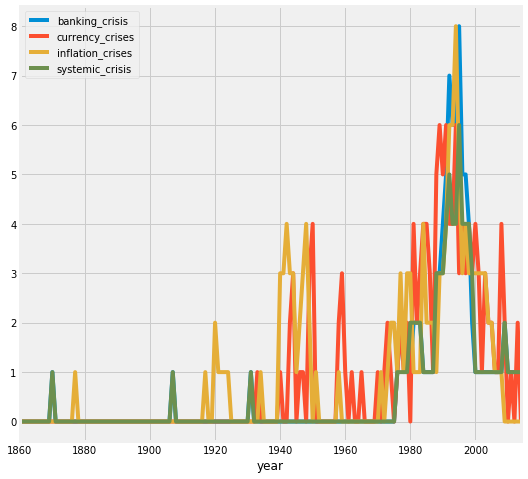

In [17]:
total_crisis.plot(figsize=(8,8))

We can see from the graph that the 1980's and 1990's were times of great turmoil in Africa. The prior dates suggest that a strong link between inflation crises and currency crises, however using one to predict the other doesn't work in future contexts. This information is useful in that the factors that lead to one, can likely lead to another.


Text(0.5, 1.0, 'Number of Economic Crises per Country')

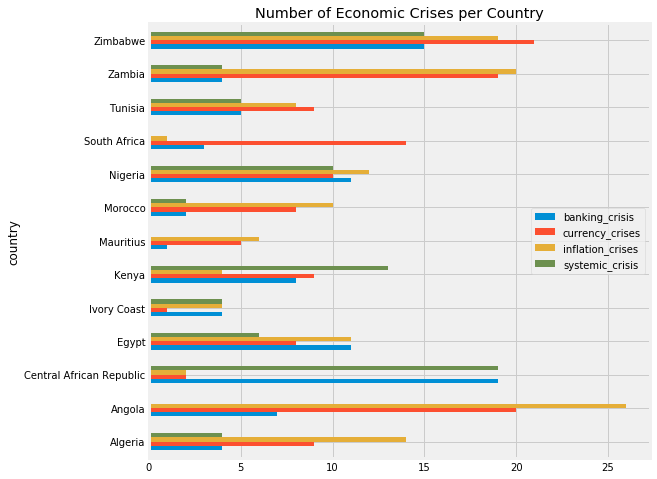

In [18]:
countries=pd.pivot_table(db, index='country', values=crisis, aggfunc=np.sum)
countries.plot(kind='barh', figsize=(8,8))
plt.title('Number of Economic Crises per Country')

From the data, we can that there is a link between the number of banking crises and the number of systemic crises. On the other side of the same coin, we see that currency and inflation prices go hand in hand as we predicted in the prior graph.  

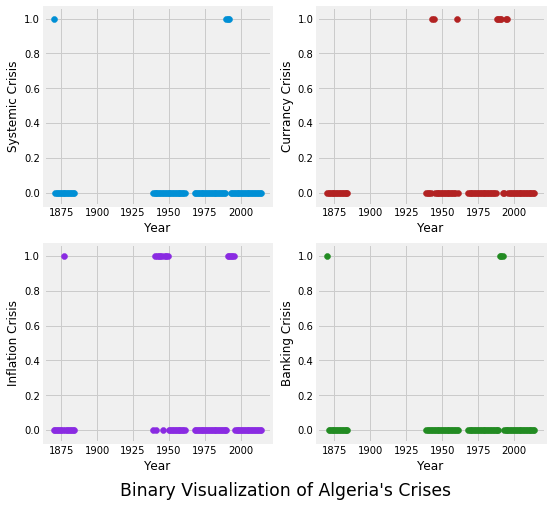

In [19]:
def crisis_history(country):

    '''
    This is a function which takes in the country of interest and it returns economic binary representations of crisis timings. 
    '''
    
    
    time=d[country]['year']
    sys=d[country]['systemic_crisis']
    curr=d[country]['currency_crises']
    inf=d[country]['inflation_crises']
    bank=d[country]['banking_crisis']

    fig=plt.figure(figsize=(8,8))
    ax1=fig.add_subplot(2,2,1)
    ax2=fig.add_subplot(2,2,2)
    ax3=fig.add_subplot(2,2,3)
    ax4=fig.add_subplot(2,2,4)
   
    #ax1.tick_params(axis='y', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    #ax2.tick_params(axis='y', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    #ax3.tick_params(axis='y', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    #ax4.tick_params(axis='y', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        
    ax1.scatter(time, sys)
    ax2.scatter(time, curr, color=red)
    ax3.scatter(time, inf, color=purple)
    ax4.scatter(time, bank, color=green)

    ax1.set(xlabel='Year', ylabel='Systemic Crisis')
    ax2.set(xlabel='Year', ylabel='Currancy Crisis')
    ax3.set(xlabel='Year', ylabel='Inflation Crisis')
    ax4.set(xlabel='Year', ylabel='Banking Crisis')

    fig.text(.5, 0.04, "Binary Visualization of {0}'s Crises".format(country), ha='center', va='center', fontsize='xx-large')
    
crisis_history('Algeria')

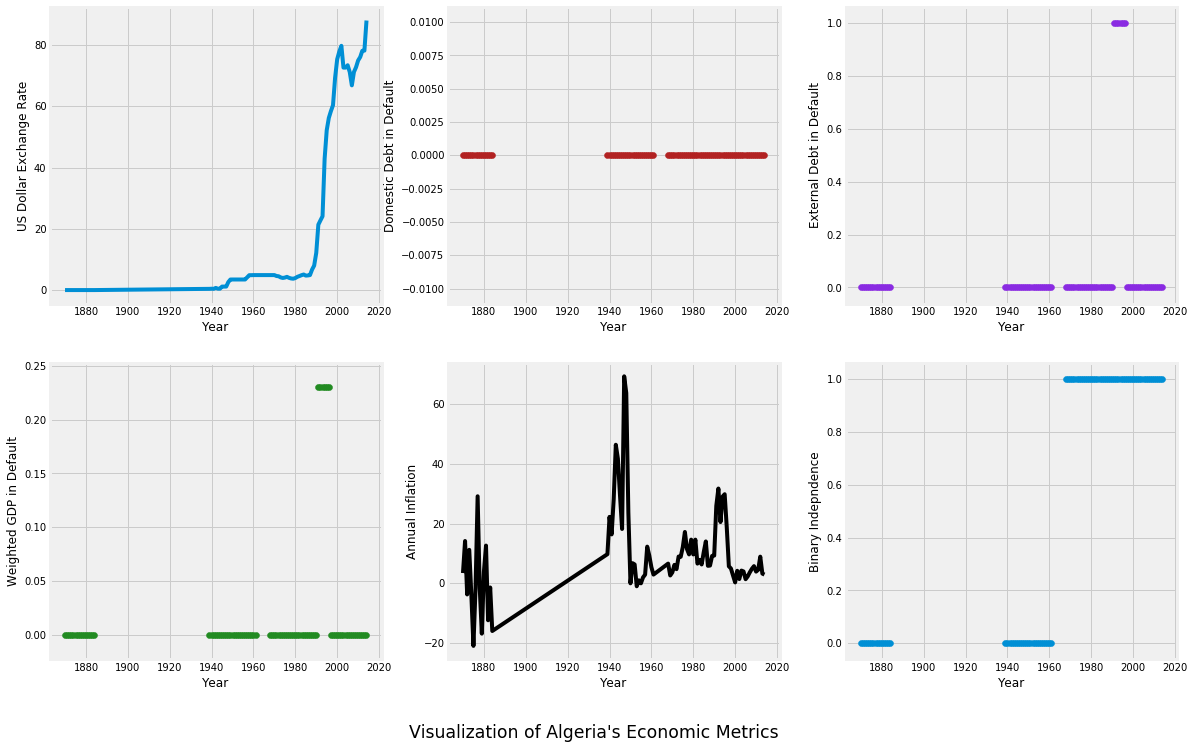

In [20]:
def metrics(country):

    '''
    This is a function which takes in the country of interest and it returns the economic metrics within the table.. 
    'exch_usd','domestic_debt_in_default', 'sovereign_external_debt_default','gdp_weighted_default', 'inflation_annual_cpi'
    '''
    
    
    time=d[country]['year']
    exch=d[country]['exch_usd']
    ddid=d[country]['domestic_debt_in_default']
    sedd=d[country]['sovereign_external_debt_default']
    gdp=d[country]['gdp_weighted_default']
    inf=d[country]['inflation_annual_cpi']
    ind=d[country]['independence']

    fig=plt.figure(figsize=(18,12))
    ax1=fig.add_subplot(2,3,1)
    ax2=fig.add_subplot(2,3,2)
    ax3=fig.add_subplot(2,3,3)
    ax4=fig.add_subplot(2,3,4)
    ax5=fig.add_subplot(2,3,5)
    ax6=fig.add_subplot(2,3,6)
        
    ax1.plot(time, exch)
    ax2.scatter(time, ddid, color=red)
    ax3.scatter(time, sedd, color=purple)
    ax4.scatter(time, gdp, color=green)
    ax5.plot(time, inf, color='black')
    ax6.scatter(time, ind)

    ax1.set(xlabel='Year', ylabel=("US Dollar Exchange Rate"))
    ax2.set(xlabel='Year', ylabel='Domestic Debt in Default')
    ax3.set(xlabel='Year', ylabel='External Debt in Default')
    ax4.set(xlabel='Year', ylabel='Weighted GDP in Default')
    ax5.set(xlabel='Year', ylabel='Annual Inflation')
    ax6.set(xlabel='Year', ylabel='Binary Indepndence')

    fig.text(.5, 0.04, "Visualization of {0}'s Economic Metrics".format(country), ha='center', va='center', fontsize='xx-large')

metrics('Algeria') #example

From the visualizations, we know that banking and systemic crises seem to result from similar factors (or one another), and that currency and banking crises result from similar factors as well. 

### Machine Learning 

Our first goal is to group the data so that it can be meaningfully used by removing cretain data features. After this, multiple model and parameter testing will be undertaken in order to figure out the most optimized way of predicting crises. 

We will be using a classifier model since our question is black and white, "Will there be a crisis?". 

In [21]:
db.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [22]:
features=list(db.columns.drop(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'currency_crises', 'inflation_crises', 'banking_crisis']))

In [43]:
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
train=normalize(db[features])
train=pd.DataFrame(train)
train.columns=features

systemic=db['systemic_crisis']
currency=db['currency_crises']
inflation=db['inflation_crises']
banking=db['banking_crisis']

In [34]:
def select_features(target):
    RF=RandomForestRegressor(random_state=1, n_estimators=10)
    
    RFE=RFECV(RF, cv=10)
    RFE.fit(train, target)
    
    best_columns=train.columns[RFE.support_]
   
    return best_columns


In [35]:
targets=[systemic, currency, inflation, banking]
empty=[]

for kind in targets:
    new=select_features(kind)
    empty.append(new)

In [36]:
train_systemic=train[empty[0]]
train_currency=train[empty[1]]
train_inflation=train[empty[2]]
train_banking=train[empty[3]]


Now that we have normalized and selected the features for each type of crisis, we can move onto testing various model types. We will use a random search cross validation sincere there are 4 target data sets meaning every model must be trained four times. This would require a large amount of computer power, so we will aim to minimize that. 

In [44]:
def select_classifier(train_set, target_set):
    
    big_dict=[{"name":"KNeighborsClassifier", 
             "estimator":KNeighborsClassifier(),
             "hyperparameters": {"n_neighbors": range(1,20, 2), 
                               "weights": ['uniform', 'distance'],
                               "algorithm": ['ball_tree', 'kd_tree', 'brute'],
                               "p":[1,2]}},
              
              {"name":"LogisticRegression",
              "estimator":LogisticRegression(),
              "hyperparameters": {'solver':["newton-cg", "lbfgs", "liblinear"]}},
              
              {"name": "RandomForestClassifier",
              "estimator":RandomForestClassifier(random_state=1),
              "hyperparameters": {'n_estimators': [4,6,9],
                                 'max_depth': [2,5,10],
                                 'max_features': ['log2', 'sqrt'],
                                 'min_samples_leaf' : [1,5,8],
                                 'min_samples_split': [2,3,5]}},
               
             {"name":"MLPClassifier",
             "estimator" : MLPClassifier(),
             "hyperparameters": {"hidden_layer_sizes":[(100,), (1000,), (100, 100), (100, 100, 100), (100,100,100,100)],
                                "solver" : ["lbfgs", "sgd", "adam"],
                                "learning_rate": ["constant", "invscaling", "adaptive"],
                                "max_iter":[1000]}}]
    list_of_dicts=[]
    
    for entry in big_dict:
        random=RandomizedSearchCV(entry['estimator'], entry['hyperparameters'], cv=10)
        random.fit(train_set, target_set)
        best_estimator=random.best_estimator_
        best_score=random.best_score_
        best_params=random.best_params_
        small_dict={'Model': entry['name'],
                    'best estimator': best_estimator,
                    'best score': best_score,
                    'best parameters': best_params
                   }
        list_of_dicts.append(small_dict)
        
    return list_of_dicts


In [38]:
select_classifier(train_banking, banking)

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[{'Model': 'KNeighborsClassifier',
  'best estimator': KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=13, p=1,
             weights='distance'),
  'best score': 0.9131255901794145,
  'best parameters': {'algorithm': 'ball_tree',
   'n_neighbors': 13,
   'p': 1,
   'weights': 'distance'}},
 {'Model': 'LogisticRegression',
  'best estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
            tol=0.0001, verbose=0, warm_start=False),
  'best score': 0.9112370160528801,
  'best parameters': {'solver': 'newton-cg'}},
 {'Model': 'RandomForestClassifier',
  'best estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=5, max_features='log2', max_leaf_nodes=None,
       

In [45]:
select_classifier(train_systemic, systemic)

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[{'Model': 'KNeighborsClassifier',
  'best estimator': KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=11, p=1,
             weights='uniform'),
  'best score': 0.9187913125590179,
  'best parameters': {'weights': 'uniform',
   'p': 1,
   'n_neighbors': 11,
   'algorithm': 'brute'}},
 {'Model': 'LogisticRegression',
  'best estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
            tol=0.0001, verbose=0, warm_start=False),
  'best score': 0.9225684608120869,
  'best parameters': {'solver': 'newton-cg'}},
 {'Model': 'RandomForestClassifier',
  'best estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=2, max_features='sqrt', max_leaf_nodes=None,
              min

In [46]:
select_classifier(train_currency, currency)

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[{'Model': 'KNeighborsClassifier',
  'best estimator': KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=15, p=1,
             weights='uniform'),
  'best score': 0.8668555240793201,
  'best parameters': {'weights': 'uniform',
   'p': 1,
   'n_neighbors': 15,
   'algorithm': 'ball_tree'}},
 {'Model': 'LogisticRegression',
  'best estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
            tol=0.0001, verbose=0, warm_start=False),
  'best score': 0.8725212464589235,
  'best parameters': {'solver': 'newton-cg'}},
 {'Model': 'RandomForestClassifier',
  'best estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=2, max_features='log2', max_leaf_nodes=None,
         

In [47]:
select_classifier(train_inflation, inflation)

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


[{'Model': 'KNeighborsClassifier',
  'best estimator': KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=11, p=1,
             weights='distance'),
  'best score': 0.9150141643059491,
  'best parameters': {'weights': 'distance',
   'p': 1,
   'n_neighbors': 11,
   'algorithm': 'brute'}},
 {'Model': 'LogisticRegression',
  'best estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
            tol=0.0001, verbose=0, warm_start=False),
  'best score': 0.8706326723323891,
  'best parameters': {'solver': 'newton-cg'}},
 {'Model': 'RandomForestClassifier',
  'best estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=10, max_features='log2', max_leaf_nodes=None,
              

From this search, we see that the highest performing model for each type of crisis is the Random Forest Classifier. We will now fine tune the model in order to eek out the highest degree of performance possible.This will involve a RandomizedSearchCV built into a function which will test a variety of configurations that are close to the initial configuration found in the prior randomized search. 

In [62]:
def forest_finder(train_set, target_set):
    
    """
    This function will take in a training set in two forms in order to find the highest performing Random Forest. 
    """
    
    entry={"name": "RandomForestClassifier",
              "estimator":RandomForestClassifier(random_state=1),
              "hyperparameters": {'n_estimators': [5,6,7, 8],
                                 'max_depth': range(2, 14),
                                 'max_features': ['log2', 'sqrt'],
                                 'min_samples_leaf' : range(2, 10),
                                 'min_samples_split': range(2, 10)}}
    
   
    random=RandomizedSearchCV(entry['estimator'], entry['hyperparameters'], cv=10)
    random.fit(train_set, target_set)
    best_estimator=random.best_estimator_
    best_score=random.best_score_
    best_params=random.best_params_
    small_dict={'Model': 'RandomForestClassifier',
                'best estimator': best_estimator,
                'best score': best_score,
                'best parameters': best_params
                   }
    return small_dict    

In [63]:
targets=[systemic, currency, inflation, banking]
trains=[train_systemic, train_currency, train_inflation, train_banking]

new=[]
counter=0
for target in targets:
    added=forest_finder(trains[counter], target)
    new.append(added)
    counter+=1
new

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[{'Model': 'RandomForestClassifier',
  'best estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=4, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=8,
              min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
              oob_score=False, random_state=1, verbose=0, warm_start=False),
  'best score': 0.9235127478753541,
  'best parameters': {'n_estimators': 6,
   'min_samples_split': 8,
   'min_samples_leaf': 8,
   'max_features': 'sqrt',
   'max_depth': 4}},
 {'Model': 'RandomForestClassifier',
  'best estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=6, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=9,
              min_weight_f

Now that we have honed in the highest accuracy models for each crisis type. It is time to generate usable models for each type.

In [105]:
train_systemic=train[empty[0]]
train_currency=train[empty[1]]
train_inflation=train[empty[2]]
train_banking=train[empty[3]]

systemic=db['systemic_crisis']
currency=db['currency_crises']
inflation=db['inflation_crises']
banking=db['banking_crisis']


In [114]:
def find_systemic(country, exch_usd, sovereign_external_debt_default, inflation_annual_cpi, independence):
    """
    This function will take in the attributes used by the predictor function, train a model based off of the parameters found
    as well as give a prediction for the given country with the stats provided. In this process it will normalize each input 
    value as needed.
    __________________________________________________________________________________________________________________________
    
    country: Name of the country being studied
    exch_usd: The rate of US Dollars to the local currency 
    sovereign_external_debt_default: Did the country default on its external debt? Yes=1, No=0
    inflaction_annual_cpi: What is the current rate of inflation? Normalized within the table.
    independence: Is the country independent? Yes=1, No=0
    
    """
    
    
    normal_exch_usd = (exch_usd-db['exch_usd'].min())/(db['exch_usd'].max()-db['exch_usd'].min())
    normal_inflation_annual_cpi = (inflation_annual_cpi-db['inflation_annual_cpi'].min())/(db['inflation_annual_cpi'].max()-db['inflation_annual_cpi'].min())
    
    RFC=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=4, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=8,
              min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
              oob_score=False, random_state=1, verbose=0, warm_start=False)
    
    RFC.fit(train_systemic, systemic)
    prediction=RFC.predict([[normal_exch_usd, sovereign_external_debt_default, normal_inflation_annual_cpi, independence]])
    
    if prediction==1:
        answer='Yes'
    if prediction==0:
        answer='No'
        
    statement= "According to our model, {0}, {1} will have a systemic crisis. This model has performed with 92% accuracy in other cases.".format(answer, country)
    
    return statement



case                                         56
cc3                                         ZAF
country                            South Africa
year                                       1992
systemic_crisis                               0
exch_usd                                  3.053
domestic_debt_in_default                      0
sovereign_external_debt_default               0
gdp_weighted_default                          0
inflation_annual_cpi                     13.673
independence                                  1
currency_crises                               0
inflation_crises                              0
banking_crisis                                0
Name: 800, dtype: object

In [116]:
find_systemic('South Africa', 3.053, 0, 13.673, 1)

'According to our model, No, South Africa will have a systemic crisis. This model has performed with 92% accuracy in other cases.'

In [110]:
empty[1]

Index(['exch_usd', 'inflation_annual_cpi', 'independence'], dtype='object')

In [121]:
def find_currency(country, exch_usd, inflation_annual_cpi, independence):
    """
    This function will take in the attributes used by the predictor function, train a model based off of the parameters found
    as well as give a prediction for the given country with the stats provided. In this process it will normalize each input 
    value as needed.
    __________________________________________________________________________________________________________________________
    
    country: Name of the country being studied
    exch_usd: The rate of US Dollars to the local currency 
    inflaction_annual_cpi: What is the current rate of inflation? Normalized within the table.
    independence: Is the country independent? Yes=1, No=0
    
    """
    
    
    normal_exch_usd = (exch_usd-db['exch_usd'].min())/(db['exch_usd'].max()-db['exch_usd'].min())
    normal_inflation_annual_cpi = (inflation_annual_cpi-db['inflation_annual_cpi'].min())/(db['inflation_annual_cpi'].max()-db['inflation_annual_cpi'].min())
    
    RFC=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=6, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=9,
              min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
              oob_score=False, random_state=1, verbose=0, warm_start=False)
    
    RFC.fit(train_currency, currency)
    prediction=RFC.predict([[normal_exch_usd, normal_inflation_annual_cpi, independence]])
    
    if prediction==1:
        answer='Yes'
    if prediction==0:
        answer='No'
        
    statement= "According to our model, {0}, {1} will have a currency crisis. This model has performed with 88% accuracy in other cases.".format(answer, country)
    
    return statement

In [122]:
db.loc[800, :]

case                                         56
cc3                                         ZAF
country                            South Africa
year                                       1992
systemic_crisis                               0
exch_usd                                  3.053
domestic_debt_in_default                      0
sovereign_external_debt_default               0
gdp_weighted_default                          0
inflation_annual_cpi                     13.673
independence                                  1
currency_crises                               0
inflation_crises                              0
banking_crisis                                0
Name: 800, dtype: object

In [124]:
empty[2]

Index(['exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence'],
      dtype='object')

In [127]:
def find_inflation(country, exch_usd, domestic_debt_in_default, sovereign_external_debt_default, inflation_annual_cpi, independence):
    """
    This function will take in the attributes used by the predictor function, train a model based off of the parameters found
    as well as give a prediction for the given country with the stats provided. In this process it will normalize each input 
    value as needed.
    __________________________________________________________________________________________________________________________
    
    country: Name of the country being studied
    exch_usd: The rate of US Dollars to the local currency 
    domestic_debt_in_default: Did the country default on its domestic debt? Yes=1, No=0
    sovereign_external_debt_default: Did the country default on its external debt? Yes=1, No=0
    inflaction_annual_cpi: What is the current rate of inflation? Normalized within the table.
    independence: Is the country independent? Yes=1, No=0
    
    """
    
    
    normal_exch_usd = (exch_usd-db['exch_usd'].min())/(db['exch_usd'].max()-db['exch_usd'].min())
    normal_inflation_annual_cpi = (inflation_annual_cpi-db['inflation_annual_cpi'].min())/(db['inflation_annual_cpi'].max()-db['inflation_annual_cpi'].min())
    
    RFC=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=9, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=7,
              min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=None,
              oob_score=False, random_state=1, verbose=0, warm_start=False)
    
    RFC.fit(train_systemic, systemic)
    prediction=RFC.predict([[normal_exch_usd, sovereign_external_debt_default, normal_inflation_annual_cpi, independence]])
    
    if prediction==1:
        answer='Yes'
    if prediction==0:
        answer='No'
        
    statement= "According to our model, {0}, {1} will have a inflation crisis. This model has performed with 93% accuracy in other cases.".format(answer, country)
    
    return statement

In [128]:
find_inflation('South Africa', 3.053, 0,0, 13.673, 1)

'According to our model, No, South Africa will have a inflation crisis. This model has performed with 93% accuracy in other cases.'

In [129]:
empty[3]

Index(['exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'inflation_annual_cpi',
       'independence'],
      dtype='object')

In [130]:
def find_banking(country, exch_usd, domestic_debt_in_default, sovereign_external_debt_default, inflation_annual_cpi, independence):
    """
    This function will take in the attributes used by the predictor function, train a model based off of the parameters found
    as well as give a prediction for the given country with the stats provided. In this process it will normalize each input 
    value as needed.
    __________________________________________________________________________________________________________________________
    
    country: Name of the country being studied
    exch_usd: The rate of US Dollars to the local currency 
    domestic_debt_in_default: Did the country default on its domestic debt? Yes=1, No=0
    sovereign_external_debt_default: Did the country default on its external debt? Yes=1, No=0
    inflaction_annual_cpi: What is the current rate of inflation? Normalized within the table.
    independence: Is the country independent? Yes=1, No=0
    
    """
    
    
    normal_exch_usd = (exch_usd-db['exch_usd'].min())/(db['exch_usd'].max()-db['exch_usd'].min())
    normal_inflation_annual_cpi = (inflation_annual_cpi-db['inflation_annual_cpi'].min())/(db['inflation_annual_cpi'].max()-db['inflation_annual_cpi'].min())
    
    RFC=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=5, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=8,
              min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
              oob_score=False, random_state=1, verbose=0, warm_start=False)
    
    RFC.fit(train_systemic, systemic)
    prediction=RFC.predict([[normal_exch_usd, sovereign_external_debt_default, normal_inflation_annual_cpi, independence]])
    
    if prediction==1:
        answer='Yes'
    if prediction==0:
        answer='No'
        
    statement= "According to our model, {0}, {1} will have a banking crisis. This model has performed with 91% accuracy in other cases.".format(answer, country)
    
    return statement

In [131]:
find_banking('South Africa', 3.053, 0,0, 13.673, 1)

'According to our model, No, South Africa will have a banking crisis. This model has performed with 91% accuracy in other cases.'

### Conclusion

In this project we have looked to create models which predict whether or not a country in Africa with a given set of economic stats will have either a banking, systemic, inflation, or currency crises. To this end, we were able to generate models with anywhere between 88-93% accuracy. This is good, but there are other avenues with which to explore.

The primary area for increased accuracy for this model would be to add other features. Possible features could include "global economic recession", "war", and "neighbors in crisis". For global economic recession, it would be a binary indicator of whether there was a general economic recession at the time; this would speak to the connectedness of the world economy and how it affects African countries. "War" would be a binary indicator; it would signify whether there was an ongoing war within the country and could speak to war's ability to destabalize economies. "Neighbors in crisis" would indicate the number of neighboring countries that were dealing with an economic crisis. This stat would be an indicator of the health of local trade. 